# **MNIST Digit Recognizer with CNN**

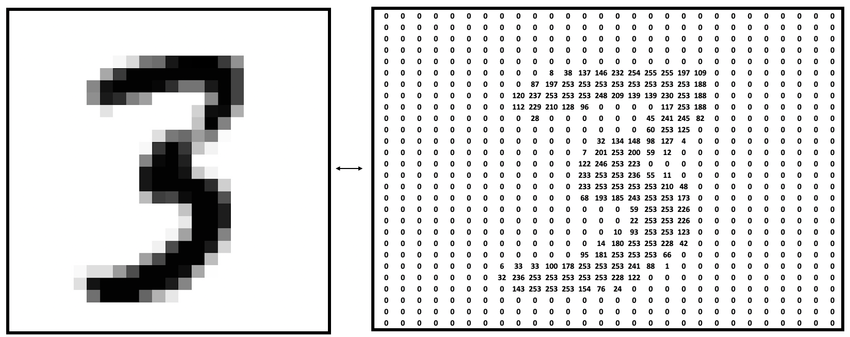


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.head()

print("train shape: ",train.shape)
print("test shape: ",test.shape)

train shape:  (42000, 785)
test shape:  (28000, 784)


In [3]:
print(train['label'].unique())
print(train['label'].nunique())

[1 0 4 7 3 5 8 9 2 6]
10


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train = train.iloc[:,:1]
x_train = train.iloc[:,1:]
x_test = test
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (42000, 784)
y_train shape:  (42000, 1)
x_test shape:  (28000, 784)


In [7]:
#Normalize

x_train = x_train/255.
x_test  = x_test/255.

#Reshape images

x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

#One-hot encoding

num_classes=10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (42000, 28, 28, 1)
y_train shape:  (42000, 10)
x_test shape:  (28000, 28, 28, 1)


In [8]:
print(x_train.ndim)

4


In [9]:
#Printing original labels of top 5 rows
print(train['label'].head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [10]:
#One hot encoding of the same labels
print(y_train[0:5,:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# **Sample from data**

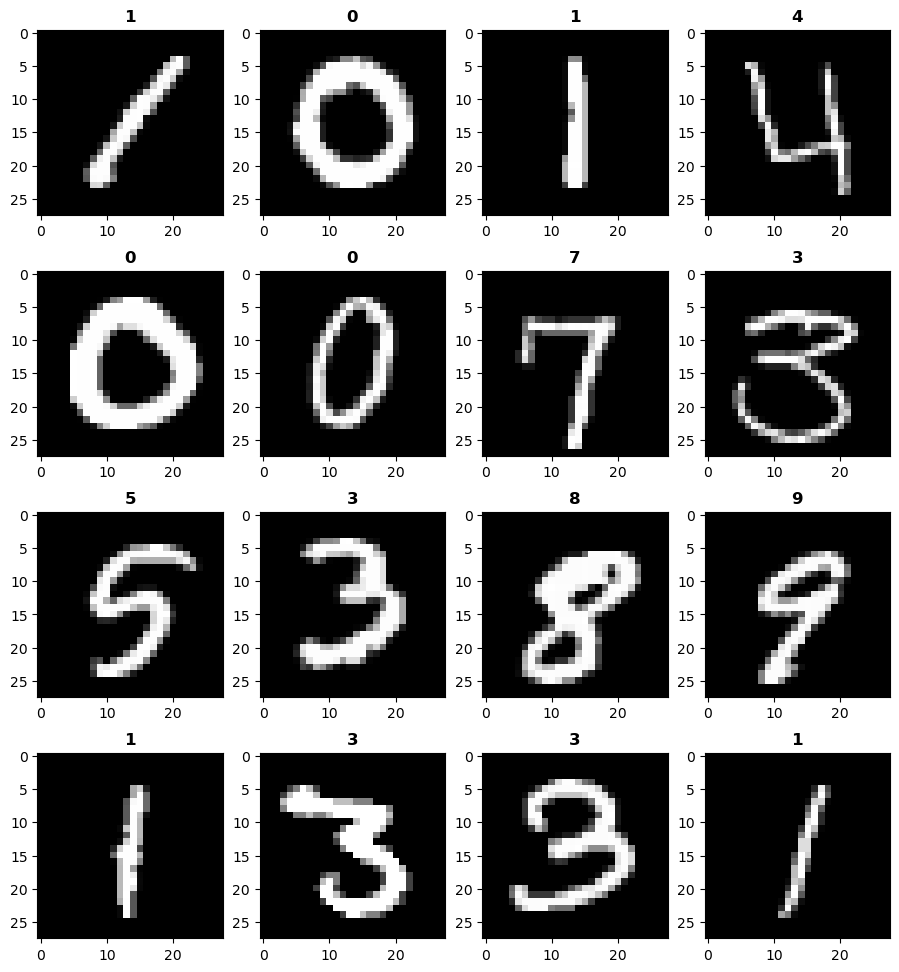

In [11]:
fig = plt.figure(figsize = (11, 12))

for i in range(16):  
    plt.subplot(4,4,1 + i)
    plt.title(np.argmax(y_train[i]),fontweight="bold")
    plt.imshow(x_train[i,:,:,0], cmap=plt.get_cmap('gray'))
plt.show()

# **Defining the model**
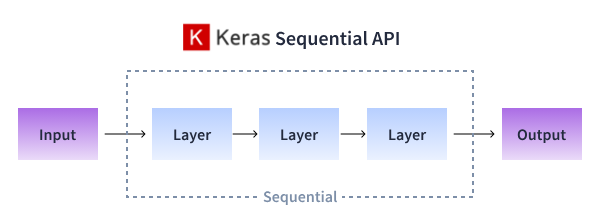

In [12]:
#Defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                 

# **Defining the callback function to stop our training once the acceptable accuracy is reached**

In [13]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True
    
callbacks = myCallback()

# **Data Augmentation - for better acc** 
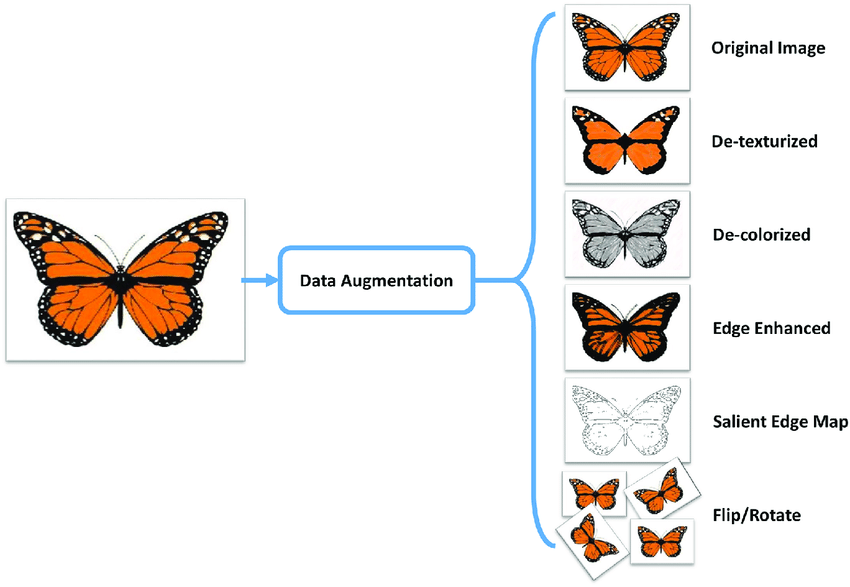

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
datagen = ImageDataGenerator(
    rotation_range=15,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.1,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)

In [16]:
training_flow = datagen.flow(x_train, y_train)
#validation_flow = datagen.flow(X_train, y_train, subset='validation', shuffle=False)

Text(0.5, 1.0, 'Example transformation')

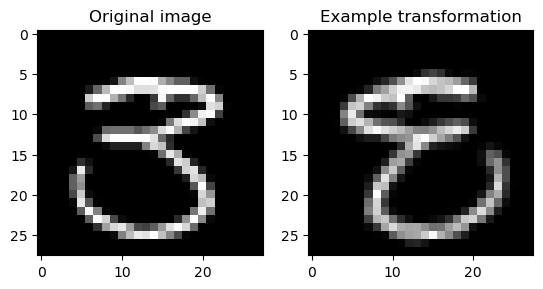

In [17]:
img = x_train[7]

fig, ax = plt.subplots(1,2)
ax[0].imshow((img), cmap=plt.get_cmap('gray'))
ax[0].set_title("Original image")
ax[1].imshow((datagen.apply_transform(img,{'theta':-10,'channel_shift_intensity':0.05,'flip_horizontal':True})) ,cmap=plt.get_cmap('gray'))
ax[1].set_title("Example transformation")

# **Compiling the model, batch sizes: 32,64,128**
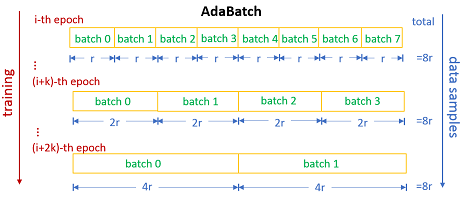

In [18]:
#Compiling and model training with batch size = 64, epochs = 100, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_flow, batch_size = 64, epochs = 100, callbacks=[callbacks])

Epoch 1/100


1313/1313 [==============================] - 19s 14ms/step - loss: 0.6738 - accuracy: 0.7712
Epoch 2/100
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2085 - accuracy: 0.9366
Epoch 3/100
1313/1313 [==============================] - 18s 14ms/step - loss: 0.1595 - accuracy: 0.9530
Epoch 4/100
1313/1313 [==============================] - 17s 13ms/step - loss: 0.1337 - accuracy: 0.9596
Epoch 5/100
1313/1313 [==============================] - 19s 14ms/step - loss: 0.1166 - accuracy: 0.9645
Epoch 6/100
1313/1313 [==============================] - 19s 14ms/step - loss: 0.1062 - accuracy: 0.9688
Epoch 7/100
1313/1313 [==============================] - 19s 15ms/step - loss: 0.1033 - accuracy: 0.9701
Epoch 8/100
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0940 - accuracy: 0.9722
Epoch 9/100
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0859 - accuracy: 0.9742
Epoch 10/100
1313/1313 [=============================

#  **Plotting the results** 

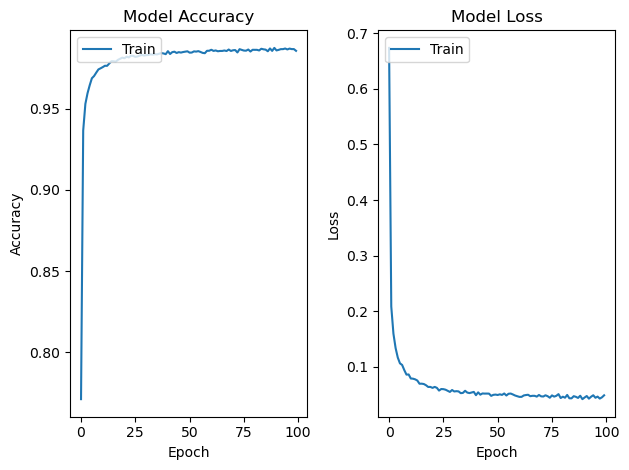

In [19]:
# Model Accuracy
plt.subplot(1, 2, 1)  
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Model Loss
plt.subplot(1, 2, 2)  
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Show the graphic
plt.tight_layout()  
plt.show()


# **With this predict %99.5 Acc**

In [20]:
results = model.predict(x_test)

# Select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 5s 5ms/step


In [21]:
print(results)

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64


In [22]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [23]:
submission = pd.read_csv('submission.csv')
print(submission.head())
print(submission.info())

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB
None
